### 붓꽃 데이터 세트
- 사이킷런에서 제공하는 데이터

In [82]:
from sklearn import datasets 

In [83]:
iris = datasets.load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [84]:
print(iris['data'].shape)  # 150개의 샘플, 4개의 feature
print(iris['target'])  # 레이블 데이터

(150, 4)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


#### 데이터 분리

In [85]:
from sklearn.model_selection import train_test_split

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# 총 150개의 샘플이 120(80%) : 30(20%)으로 분류 
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


#### 모델 선택 :KNN 알고리즘

In [86]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)  # 이웃의 개수는 6개
knn.fit(X_train, y_train)  # 학습데이터로 fit()

KNeighborsClassifier(n_neighbors=6)

In [87]:
y_pred = knn.predict(X_test)  # test set으로 예측

from sklearn import metrics
scores = metrics.accuracy_score(y_test, y_pred)  # 예측값과 정답을 비교하여 정확도 평가하기 

print(scores)

0.9666666666666667


In [88]:
classes = {0:"setosa", 1:"versicolor", 2:"verginica"}

x_new = [[3,4,5,2], [5,4,2,2]]  ## sklearn은 2차원 배열 데이터만 다룬다
y_predict = knn.predict(x_new)

print(y_predict)
print(classes[y_predict[0]])
print(classes[y_predict[1]])

[1 0]
versicolor
setosa


### MNIST 필기체 숫자 이미지
- 28*28 = 784(픽셀) : 원본데이터
- sklearn 제공 데이터 : 8*8 픽셀(데이터 용량 문제)

In [89]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

In [90]:
digits = datasets.load_digits()
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

In [91]:
digits.data.shape  ## 1797개의 샘플 존재, 8*8 픽셀


(1797, 64)

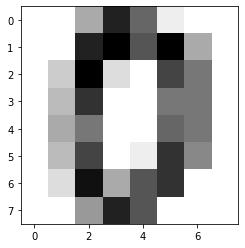

In [92]:
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation="nearest")

### 데이터 정제

In [93]:
n_samples = len(digits.images)  # 총 샘플의 개수(1797)

data = digits.images.reshape(n_samples, -1)  # 2차원 배열로 평탄화 

print(digits.images.shape)  # before
print(data.shape)  # after

(1797, 8, 8)
(1797, 64)


### 데이터 분리

In [94]:
y = digits.target

In [95]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2)

### 모델링 : KNN

In [96]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [97]:
y_pred = knn.predict(X_test)

scores = metrics.accuracy_score(y_test, y_pred)
print(scores)

0.9888888888888889


### 이미지 출력해보기

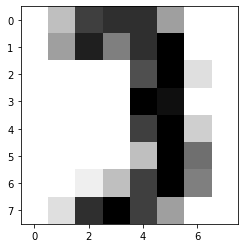

In [98]:
plt.imshow(X_test[10].reshape(8, 8), cmap = plt.cm.gray_r, interpolation="nearest")


In [99]:
y_prediction = knn.predict([X_test[10]])  # 입력은 항상 2차원 행렬 

print(y_prediction)

[3]


### 성능평가
- 정확도 : 데이터셋에 따라 편향 가능성 존재
- 혼동행렬(confusion matrix)

c:\Users\Enc\anaconda3\envs\main\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


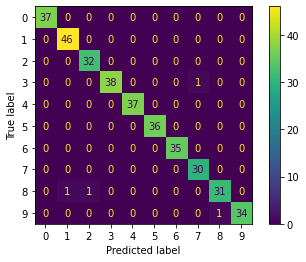

In [100]:
disp = metrics.plot_confusion_matrix(knn, X_test, y_test)

# 주대각선 값은 높을 수록 좋음 
# 10*10 행렬 => 클래스 크기만큼 

### 분류 리포트

In [101]:
print(f'{metrics.classification_report(y_test, y_pred)}\n')



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.98      1.00      0.99        46
           2       0.97      1.00      0.98        32
           3       1.00      0.97      0.99        39
           4       1.00      1.00      1.00        37
           5       1.00      1.00      1.00        36
           6       1.00      1.00      1.00        35
           7       0.97      1.00      0.98        30
           8       0.97      0.94      0.95        33
           9       1.00      0.97      0.99        35

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360


